In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
data = datasets.load_iris()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.shape

(150, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df['target'] = pd.Series(data.target)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

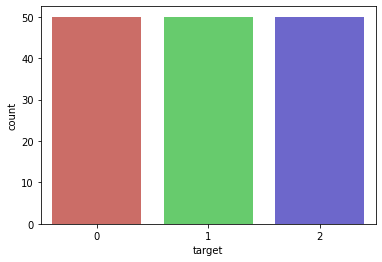

In [10]:
sns.countplot(x='target',data=df,palette='hls')
plt.show()

In [11]:
X = df.iloc[:,:4].values

In [12]:
y = df.iloc[:,-1:].values

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
clf = SVC()

In [15]:
clf.fit(X_train,y_train)

/home/himalaya/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# View support vectors
clf.support_vectors_

array([[5.4, 3.4, 1.7, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.4, 3.9, 1.7, 0.4],
       [5.1, 3.3, 1.7, 0.5],
       [5. , 3. , 1.6, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.3, 3.3, 4.7, 1.6],
       [7. , 3.2, 4.7, 1.4],
       [6. , 3.4, 4.5, 1.6],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [6.1, 3. , 4.6, 1.4],
       [6.9, 3.1, 4.9, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [6.2, 2.2, 4.5, 1.5],
       [5.7, 2.9, 4.2, 1.3],
       [5.5, 2.3, 4. , 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.4, 2.9, 4.3, 1.3],
       [4.9, 2.4, 3.3, 1. ],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 2.6, 3.5, 1. ],
       [6.3, 2.5, 4.9, 1.5],
       [6.7, 3. , 5. , 1.7],
       [6.6, 2.9, 4.6, 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3

In [17]:
# View indices of support vectors
clf.support_

array([ 27,  46,  56,  66,  89,   0,   7,  13,  15,  18,  19,  21,  29,
        32,  34,  36,  57,  63,  64,  67,  70,  72,  84,  87,  88,  94,
        96,  97,   1,   3,   9,  10,  11,  12,  14,  17,  25,  31,  44,
        49,  50,  53,  71,  74,  85,  86,  92, 101], dtype=int32)

In [18]:
y_pred = clf.predict(X_test)
print("My clasiifier accuracy is == {:.2f}".format(clf.score(X_test,y_test)))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

My clasiifier accuracy is == 0.98
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


Text(0.5, 257.44, 'Predicted label')

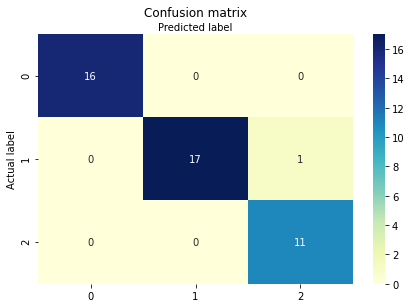

In [19]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
new_data = [[5.6,2.8,4.9,2]]

In [21]:
print(clf.predict(new_data))

[2]


In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

